# Scrapy Spider
Webscraping with Python using Scrapy framework to create a visual text word count dictionary

##### by Nickie Burns

### BACKGROUND | refresher, prerequisites, notebook imports
1. PYTHON |You must have at least some experience with Python. <br>
2. OBJECTS | Scrapy uses object-oriented programming.  I am not going to get into what this means, but it must be understood or at least reviewed before creating this project.  <br>
3. REQUESTS AND RESPONSE OBJECTS | Scrapy uses request and response objects, similar to how a web browser uses HTTP requests and responds with renderings.  Scrapy needs only a url to create a request.  A scrapy response object holds a lot of fields that can be manipulated: html source code, css paths, xpaths, etc.
4. IMPORTS | Imports for jupyter notebook go at the top of the notebook, whereas, within the scrapy project itself, some imports will need to be used within multiple files. See source code for imports in scrapy project files!<br> 


In [1]:
# this is used to render images within this notebok
from IPython.display import Image

# cut & pasted from project\spiders\ncbioimpact_org.py
import scrapy as sc
from scrapy.http import Request
from scrapy.loader import ItemLoader
from datetime import date
from bs4 import BeautifulSoup

# cut & pasted from project\items.py
from scrapy.loader.processors import MapCompose, TakeFirst
from w3lib.html import remove_tags, replace_escape_chars

# cut & pasted from project\middlewares.py
from scrapy import signals

### MY TOOL BOX | excluding software
This is what I use, though use of this specific list is not dogma! 

#### Scrapy Docs -- https://docs.scrapy.org/ 

The documentation is always really important, of course.  The documention for scrapy has tutorials on how to start a project, create a spider, explains the use of spiders (including the required parse() function), items, itemloaders, and many other things covered not as extensively as in this report.  I use Beautiful Soup Docs -- https://www.crummy.com/software/BeautifulSoup/bs4/doc/. The following tutorials guided me through this process:  https://www.geeksforgeeks.org/python-program-crawl-web-page-get-frequent-words/ https://www.datacamp.com/community/tutorials/web-scraping-python-nlp. I am using Jupyter Notebook for this report, whose documentation can be found here -- https://jupyter-notebook.readthedocs.io/en/stable/ (this is optional). 

#### White Boards
I use a handheld white board from Amazon that has lines on the front, with a spray bottle with alcohol in it to clean it, and I take pictures of useful diagrams.

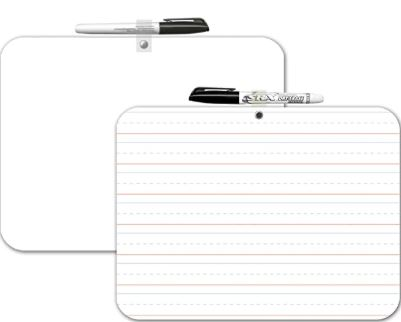

In [9]:
Image(filename=r"spiders\docs_and_notes\white_board.JPG")

#### A Mindmapping Program
I use edraw's MindMaster to create all of the little mindmaps in this notebook.  I then use the Window's snipping tool to save images of the snips as .jpg files so I could open them whenever I needed them! ...and as you can see I use them in this notebook. I also make .txt versions of these as well and save them in the same place.

### USER STORIES
Create user stories before you start scraping.  This way you can determine what you actually want to get from the spider itself.  I learned a really good method for creating user stories from this short youtube video: https://www.youtube.com/watch?v=apOvF9NVguA Below is the mindmap of my user stories for this web scraper.  I tried to make them Agile.  I don't know that they are 100% Agile, but they are at least close.

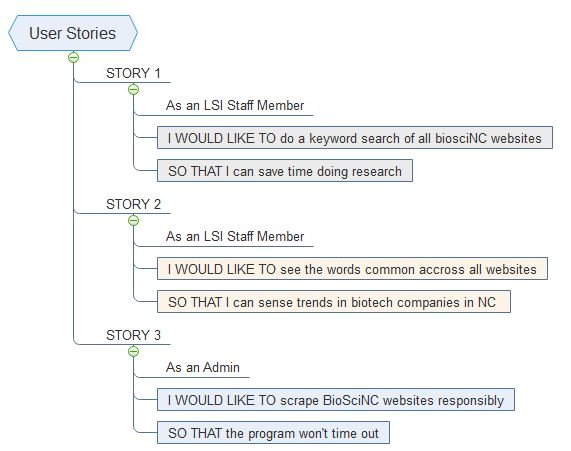

In [8]:
Image(filename=r"spiders\docs_and_notes\user_stories.JPG")

### DIRECTORY STRUCTURE | see documentation

### ITEMS | see documentation
A Scrapy item is just an object to store your scraped data.  It is like a python dictionary, where each field represents a name string, stored as a key, and a value, which can be any data type (for example, a list, a string, a date, an object). The items.py file is generated automatically by Scrapy.  This is where you store your item definitions.  They are declared using the following template, where the name can be any string, which I have labeled here "fieldNameOne", "fieldNameTwo", etc.  

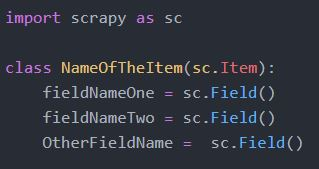

In [10]:
Image(filename=r'spiders\docs_and_notes\item_template.jpg')

##### NOTE: You can use "import scrapy" without "as sc" but then you will have to use fieldNameOne = scrapy.Field() rather than sc.Field().  
Below is a mindmap of the item that is output by this spider, which I created to respond to user story needs. The key 'url' has the value of the scraped url as a string. The key 'wrd_cnts' has the value of a word count dictionary.  The key 'scrape_date' has the value of a date that is the date the url was scraped.

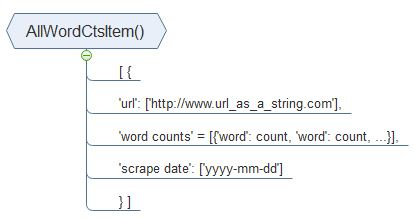

In [11]:
Image(filename=r'spiders\docs_and_notes\items.jpg')

#### items.py
The following goes in items.py.<br>


###### See source code for imports in scrapy project files! <br>%load statement is for use within jupyter notebook, and can be excluded from scrapy project code.

In [ ]:
# %load items.py
# import scrapy as sc
# from scrapy.loader.processors import MapCompose, TakeFirst
# from w3lib.html import remove_tags, replace_escape_chars

class NcbioimpactOrgItem(sc.Item):
    url = sc.Field() # a string
    wrd_cts = sc.Field() # a dictionary
    scrape_date =  sc.Field() # 'yyyy-mm-dd'


### SPIDERS | see documentation
Spiders are saved within the spiders directory, usually as NameOfSpider.py.  A spider has many optional attributes and methods, but there is no spider without a name attribute, urls to create requests, and a parse() method.

#### name attribute (required)
stored as a string, uniquely identifies the spider

#### urls to create requests (required)
stored in the start_urls attribute, as a list of urls, OR as a start_requests() method

#### parse() method (required)
which takes in the url requests, recieves the response object, which it uses to create items and/or a new list of urls to send back into the prgram to parse().

###### See source code for imports in scrapy project files! <br>%load statement is for use within jupyter notebook, and can be excluded from scrapy project code. 

In [ ]:
# %load spiders\ncbioimpact_org.py

class NcbioimpactOrgSpider(sc.Spider):
    name = 'ncbioimpact_org'
    allowed_domains = ['ncbioimpact.org']

    start_urls = [\
    'http://www.ncbioimpact.org/index.html',
    'http://www.ncbiotech.org'
    ]

    def parse(self, response):

        # Item['url'] is a string
        url = response.url

        # Item['wrd_cts'] is a dictionary
        source_html = response.text
        soup = BeautifulSoup(source_html, 'html.parser')
        wrd_cts_dict = source_to_dict(soup) #item_functions.py

        # Item['scrape_date'] is a date string : 'yyyy-mm-dd'
        today = date.today()

        l = ItemLoader(item=NcbioimpactOrgItem(), response=response)
        l.add_value('url', url)
        l.add_value('wrd_cts', wrd_cts_dict)
        l.add_value('scrape_date', today)
        yield l.load_item()